## This script contains the following:
1. Importing libraries and data and renaming columns
2. The elbow technique
3. k-means clustering

## 1.Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# creating path

path = r'C:\Users\dequw\Documents\UFC Project Folder'

In [4]:
#importing data set
df_UFC = pd.read_csv(os.path.join(path, 'Prepared Data UFC', 'UFC_Prepared_Data.csv'), index_col = False)

In [5]:
df_UFC.shape

(4954, 33)

In [7]:
df_UFC.head()

,Unnamed: 0,r_fighter,b_fighter,date_of_fight,location,winner,weight_class,b_wins,b_losses,b_win_by_decision_majority,...,r_win_by_decision_unanimous,r_win_by_ko/tko,r_win_by_submission,r_win_by_tko_doctor_stoppage,r_stance,r_height_cms,r_Reach_cms,r_weight_lbs,b_age,r_age
0,0,Adrian Yanez,Gustavo Lopez,3/20/2021,"Las Vegas, Nevada, USA",Red,Bantamweight,1,1,0,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,1,Trevin Giles,Roman Dolidze,3/20/2021,"Las Vegas, Nevada, USA",Red,Middleweight,2,0,0,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
2,2,Tai Tuivasa,Harry Hunsucker,3/20/2021,"Las Vegas, Nevada, USA",Red,Heavyweight,0,0,0,...,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0
3,3,Cheyanne Buys,Montserrat Conejo,3/20/2021,"Las Vegas, Nevada, USA",Blue,WomenStrawweight,0,0,0,...,0,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0
4,4,Marion Reneau,Macy Chiasson,3/20/2021,"Las Vegas, Nevada, USA",Blue,WomenBantamweight,4,1,0,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0


In [12]:
df_UFC = df_UFC.drop('Unnamed: 0',axis=1)

In [13]:
df_UFC = df_UFC.drop('r_fighter',axis=1)

In [14]:
df_UFC = df_UFC.drop('b_fighter',axis=1)

In [15]:
df_UFC = df_UFC.drop('location',axis=1)

In [16]:
df_UFC = df_UFC.drop('r_stance',axis=1)

In [17]:
df_UFC = df_UFC.drop('b_stance',axis=1)

In [21]:
df_UFC =df_UFC.drop('weight_class',axis=1)

In [23]:
df_UFC =df_UFC.drop('winner',axis=1)

In [28]:
df_UFC =df_UFC.drop('date_of_fight',axis=1)

In [29]:
df_UFC.head()

,b_wins,b_losses,b_win_by_decision_majority,b_win_by_decision_split,b_win_by_decision_unanimous,b_win_by_ko/tko,b_win_by_submission,b_win_by_tko_doctor_stoppage,b_height_cms,b_Reach_cms,...,r_win_by_decision_split,r_win_by_decision_unanimous,r_win_by_ko/tko,r_win_by_submission,r_win_by_tko_doctor_stoppage,r_height_cms,r_Reach_cms,r_weight_lbs,b_age,r_age
0,1,1,0,0,0,0,1,0,165.10,170.18,...,0,0,1,0,0,170.18,177.80,135.0,31.0,27.0
1,2,0,0,1,0,1,0,0,187.96,193.04,...,1,0,3,0,0,182.88,187.96,185.0,32.0,28.0
2,0,0,0,0,0,0,0,0,187.96,190.50,...,0,1,3,0,0,187.96,190.50,264.0,32.0,28.0
3,0,0,0,0,0,0,0,0,152.40,154.94,...,0,0,0,0,0,160.02,160.02,115.0,28.0,25.0
4,4,1,0,0,1,2,1,0,180.34,182.88,...,0,1,2,2,0,167.64,172.72,135.0,29.0,43.0


## 2. The elbow technique

In [30]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [31]:
score = [kmeans[i].fit(df_UFC).score(df_UFC) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\dequw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dequw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dequw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dequw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-13985830.107234636,
 -5935385.299926041,
 -3292843.79402857,
 -2306693.73941483,
 -1839267.5265355338,
 -1676965.853524284,
 -1534107.680822025,
 -1455901.1654473918,
 -1395618.945598908]

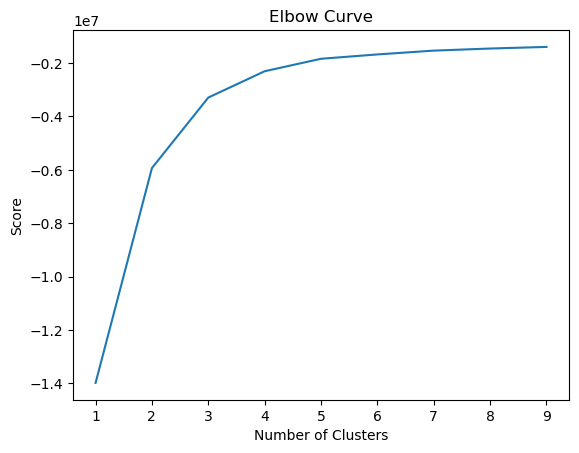

In [32]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [ ]:
# I choose 3 it jumps rapidly from two to three on the x-axis, then rises only slightly after three. 

## 3. k-means clustering

In [33]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [35]:
# Fit the k-means object to the data.

kmeans.fit(df_UFC)

C:\Users\dequw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [39]:
df_UFC['clusters'] = kmeans.fit_predict(df_UFC)

C:\Users\dequw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [40]:
df_UFC.head()

,b_wins,b_losses,b_win_by_decision_majority,b_win_by_decision_split,b_win_by_decision_unanimous,b_win_by_ko/tko,b_win_by_submission,b_win_by_tko_doctor_stoppage,b_height_cms,b_Reach_cms,...,r_win_by_decision_unanimous,r_win_by_ko/tko,r_win_by_submission,r_win_by_tko_doctor_stoppage,r_height_cms,r_Reach_cms,r_weight_lbs,b_age,r_age,clusters
0,1,1,0,0,0,0,1,0,165.10,170.18,...,0,1,0,0,170.18,177.80,135.0,31.0,27.0,0
1,2,0,0,1,0,1,0,0,187.96,193.04,...,0,3,0,0,182.88,187.96,185.0,32.0,28.0,1
2,0,0,0,0,0,0,0,0,187.96,190.50,...,1,3,0,0,187.96,190.50,264.0,32.0,28.0,2
3,0,0,0,0,0,0,0,0,152.40,154.94,...,0,0,0,0,160.02,160.02,115.0,28.0,25.0,0
4,4,1,0,0,1,2,1,0,180.34,182.88,...,1,2,2,0,167.64,172.72,135.0,29.0,43.0,0


In [41]:
df_UFC['clusters'].value_counts()

clusters
0    2425
1    2085
2     444
Name: count, dtype: int64

C:\Users\dequw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dequw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dequw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


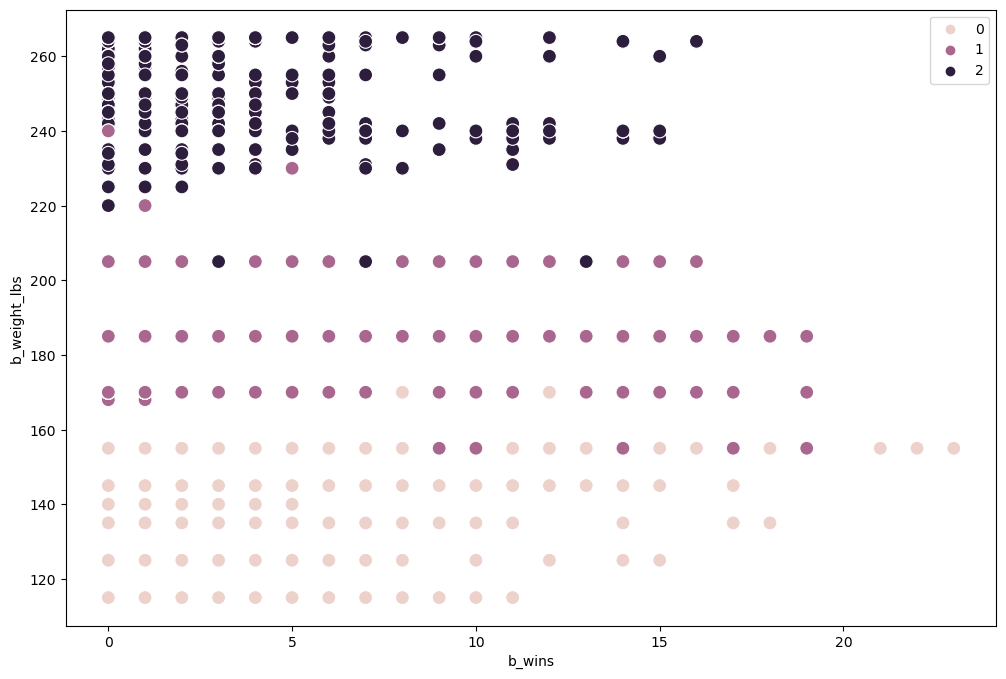

In [43]:
# Plot the clusters for the "b_wins" and "b_weight_lbs" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_UFC['b_wins'], y=df_UFC['b_weight_lbs'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('b_wins') # Label x-axis.
plt.ylabel('b_weight_lbs') # Label y-axis.
plt.show()

C:\Users\dequw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dequw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dequw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


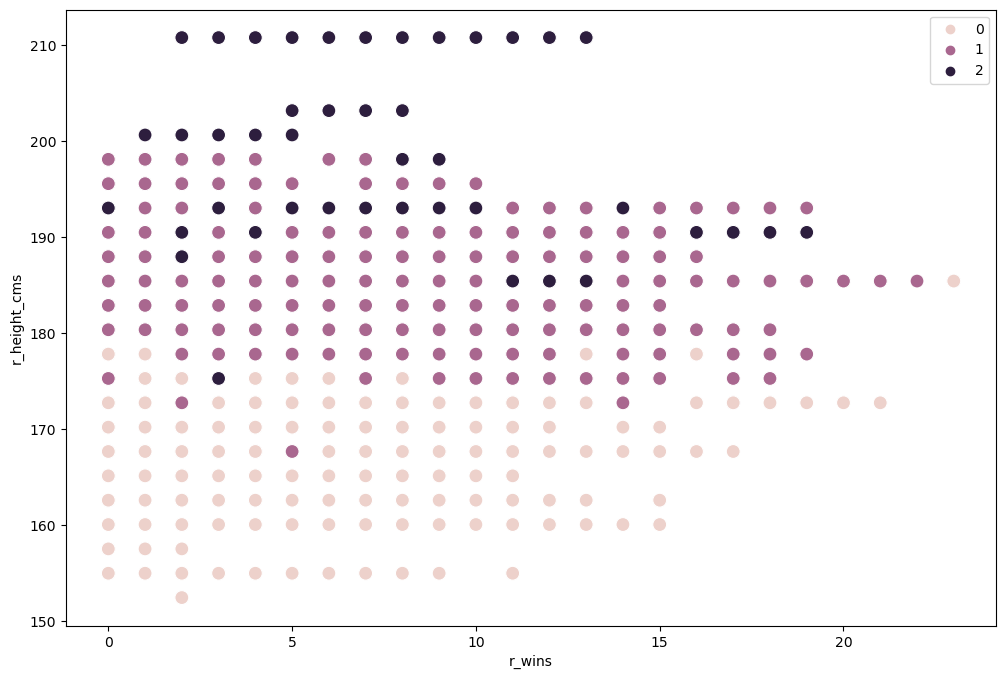

In [45]:
# Plot the clusters for the "b_wins" and "b_weight_lbs" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_UFC['r_wins'], y=df_UFC['r_height_cms'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('r_wins') # Label x-axis.
plt.ylabel('r_height_cms') # Label y-axis.
plt.show()

### 8. The clusters make sense as it falls inline with the supervised machine learning regression analysis exercise. For the first scatter plot chart, you see the plots start to darken 160lbs and higher as those fights have a higher chance of winning in the b corner. On the second plot chart, you can see the plots darken around the 176 cms to 180 cms and higher resulting in taller r corner fighters having a higher chance of winning. 

In [46]:
df_UFC.loc[df_UFC['clusters'] == 2, 'clusters'] = 'dark purple'
df_UFC.loc[df_UFC['clusters'] == 1, 'clusters'] = 'purple'
df_UFC.loc[df_UFC['clusters'] == 0, 'clusters'] = 'pink'

C:\Users\dequw\AppData\Local\Temp\ipykernel_5344\37960656.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'dark purple' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df_UFC.loc[df_UFC['clusters'] == 2, 'clusters'] = 'dark purple'


In [48]:
df_UFC.groupby('clusters').agg({'r_wins':['mean', 'median'], 
                         'b_wins':['mean', 'median'], 
                         'b_weight_lbs':['mean', 'median'],
                          'r_height_cms':['mean', 'median']})


r_wins           b_wins        b_weight_lbs         \
                 mean median      mean median         mean median   
clusters                                                            
dark purple  4.743243    4.0  3.396396    2.0   245.056306  249.0   
pink         3.798763    3.0  2.552165    2.0   141.288660  145.0   
purple       4.732374    4.0  3.474341    2.0   181.512710  185.0   

            r_height_cms          
                    mean  median  
clusters                          
dark purple   190.534324  190.50  
pink          172.003563  172.72  
purple        183.688902  182.88

##### 9.It appear the average dark purple R corner fighter has an average nearly of 5 wins when the fighter averga eheight is nearly 191cms, pink R corner fighter has an average nearly of 4 wins when the fighter averga eheight is nearly 172cms, and purple R corner fighter has an average nearly of 5 wins when the fighter averga eheight is nearly 184cms.  B fighter dark purple avergae is closer to 3 wins whne the fighter weighs an average of 245 pounds, B fighter pink avergae is closer to 3(2.5) wins when the fighter weighs an average of 141 pounds, and B fighter purple avergae is closer to 3(3.47) wins when the fighter weighs an average of 181 pounds. 

#### 10. These results can definitely help us understand what it takes to be a winner. These results have easily demonststarted how affective weight and height plays a role in the winning average for fighters.Looks like Red corner is coming out as the dominant corner from these results. 